In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.stats import chi2_contingency as chi2
from scipy.stats import pearsonr, f_oneway, ttest_ind

In [2]:
df = pd.read_excel('onnettomuudet2021.xlsx')

In [3]:
pd.options.display.max_columns = None
df

,Onnett_id,Tienpit,Tienpitsel,Tie,Aosa,Aet,Ajr,Vuosi,Kk,Päivä,Kuolleet,Loukkaant,Vakavuusko,Vakavuus,ELY,Elynimi,Poliisipri,Piirinimi,Tunti,Vkpv,Ontyyppi,Ontyypsel,Onluokka,Onlksel,Osallkm,Nopraj,Taajmerk,Taajamasel,Pinta,Pintasel,Valoisuus,Valsel,Sää,Sääsel,Onnpaikka,Onnpaiksel,Liikvalot,Liikvalsel,Liittyvtie,Maakunta,Maakuntsel,Kunta,Kuntasel,Noplaji,Noplajisel,Nopsuunvas,Nopsuunoik,Taajama,Mo_mol,Mo_molsel,Toimluokka,Toimlksel,Kvl,Raskaskvl,Tienlev,X,Y,Oslakpvm,Tietyö,Päällyste,Päällsel,Lämpötila,Risteys,Risteyssel,Rautatie,Rautatsel,Muuliit,Muuliitsel,Katuosoite,Tietyyppi,Tietyypsel,Talvhoitlk,Talvhoitsel,Tienverkas,Tienverkse,Maankäyttö,Maankäytse,Valoohjaus,Valoohjsel,Lisäkaisty,Lisäkaisse,Solmutyyp,Solmutyyps,Liitluok,Liitlksel,Lähliittie,Suuntlkm,Toimenpide,Toimpidsel,Luovpvm,Valaisomis,Valomsel,Poikkileik,Poikleikse,Päällyslev,Päällystlk,Päällksel,Nakos150,Nakos300,Nakos460,Runkotie,Alkoholi,Järjnro,Jutuntunn,Raskos,Solmunro
0,10205475,-1,Ei arvoa,NaN,NaN,NaN,NaN,2021,9,2021-09-11,0,0,0,Ei henkilövahinkoja,1,Uudenmaan ELY,5500,Helsingin poliisilaitos,16,Lauantai,40,ajo risteäviä ajosuuntia suoraan,4,risteämisonnettomuus,2,80,-1,Ei arvoa,1,"paljas, kuiva",1,päivänvalo,2,pilvipouta,1,ajorata,-1,Ei arvoa,NaN,1,Uusimaa,91,Helsinki,-1,Ei arvoa,-1,-1,,-1,Ei arvoa,-1,Ei arvoa,NaN,NaN,NaN,NaN,NaN,NaT,E,1,kestopäällyste,NaN,2,kärkikolmio,-1,Ei arvoa,-1,Ei arvoa,,-1,Ei arvoa,-1,Ei arvoa,-1,Ei arvoa,-1,Ei arvoa,-1,Ei arvoa,-1,Ei arvoa,-1,Ei arvoa,-1,Ei arvoa,NaN,NaN,-1,Ei arvoa,NaT,-1,Ei arvoa,-1,Ei arvoa,NaN,-1,Ei arvoa,NaN,NaN,NaN,NaN,0,49976,R,ei,NaN
1,10200513,1,Väylävirasto,1.0,3.0,9.0,2.0,2021,9,2021-09-26,0,0,0,Ei henkilövahinkoja,1,Uudenmaan ELY,5500,Helsingin poliisilaitos,10,Sunnuntai,52,kääntyminen vasemmalle toisen eteen tai kylkeen,4,risteämisonnettomuus,2,40,1,K,1,"paljas, kuiva",1,päivänvalo,1,kirkas,1,ajorata,1,toiminnassa,NaN,1,Uusimaa,91,Helsinki,1,tiekohtainen rajoitus,60,50,K,1,moottoritie,1,valtatie,26719.0,815.0,201.0,382585.0,6675850.0,NaT,E,1,kestopäällyste,11.0,4,liikennevalot,-1,Ei arvoa,-1,Ei arvoa,TURUNVÄYLÄ X HUOPALAHDENTIE,1,yleinen tie,1,liukkaudentorjunta ilman toimenpideaikaa,2,keskustan ohikulku kaava-alueella,2,muu maankäyttö,-1,Ei arvoa,3,lisäkaista kaikille,10,Moniajoratainen liittymä,1,liittymä,NaN,4.0,1,rakentaminen,1962-01-01,1,valtio omistaa,2,2 ajor,114.0,10,kovat asfaltit,97.0,76.0,57.0,1.0,0,48715,R,ei,10407.0
2,10084621,1,Väylävirasto,1.0,3.0,220.0,1.0,2021,8,2021-08-26,0,0,0,Ei henkilövahinkoja,1,Uudenmaan ELY,5500,Helsingin poliisilaitos,20,Torstai,80,suistuminen oikealle suoralla,1,yksittäisonnettomuus,1,80,0,E,2,"paljas, märkä",1,päivänvalo,2,pilvipouta,1,ajorata,-1,Ei arvoa,NaN,1,Uusimaa,91,Helsinki,1,tiekohtainen rajoitus,60,80,E,1,moottoritie,1,valtatie,26719.0,815.0,234.0,382357.0,6675921.0,NaT,E,1,kestopäällyste,13.0,0,linjaonnettomuus,-1,Ei arvoa,-1,Ei arvoa,Turunväylä,1,yleinen tie,1,liukkaudentorjunta ilman toimenpideaikaa,2,keskustan ohikulku kaava-alueella,2,muu maankäyttö,-1,Ei arvoa,-1,Ei arvoa,-1,Ei arvoa,-1,Ei arvoa,NaN,NaN,1,rakentaminen,1962-06-30,1,valtio omistaa,2,2 ajor,104.0,10,kovat asfaltit,97.0,76.0,57.0,1.0,0,42850,R,ei,13044.0
3,10079162,1,Väylävirasto,1.0,3.0,225.0,1.0,2021,8,2021-08-08,0,0,0,Ei henkilövahinkoja,1,Uudenmaan ELY,5500,Helsingin poliisilaitos,18,Sunnuntai,89,muu tieltä suistuminen,1,yksittäisonnettomuus,1,80,0,E,1,"paljas, kuiva",1,päivänvalo,2,pilvipouta,1,ajorata,-1,Ei arvoa,NaN,1,Uusimaa,91,Helsinki,1,tiekohtainen rajoitus,60,80,E,1,moottoritie,1,valtatie,26719.0,815.0,234.0,382352.0,6675921.0,NaT,E,1,kestopäällyste,21.0,0,linjaonnettomuus,-1,Ei arvoa,-1,Ei arvoa,TURUNVÄYLÄ,1,yleinen tie,1,liukkaudentorjunta ilman toimenpideaikaa,2,keskustan ohikulku kaava-alueella,2,muu maankäyttö,-1,Ei arvoa,-1,Ei arvoa,-1,Ei arvoa,-1,Ei arvoa,NaN,NaN,1,rakentaminen,1962-06-30,1,valtio omistaa,2,2 ajor,104.0,10,kovat asfaltit,97.0,76.0,57.0,1.0,0,39200,R,ei,13044.0
4,10086234,1,Väylävirasto,1.0,3.0,368.0,2.0,2021,8,2021-08-06,1,0,1,Kuolemaan johtanut,1,

In [4]:
# ristiintaulukoidaan onnettomuuden vakavuus ja alkoholin käyttö
df1 = pd.crosstab(df['Vakavuus'], df['Alkoholi'])

alk = ['Ei', 'Kyllä']
df1.columns = alk
df1.columns.name = 'Alkoholi'

df1

Alkoholi,Ei,Kyllä
Vakavuus,,
Ei henkilövahinkoja,6165,455
Kuolemaan johtanut,151,35
Loukkaantumiseen johtanut,2529,232


In [5]:
# tehdään prosenttitaulukko
df2 = pd.crosstab(df['Vakavuus'], df['Alkoholi'], normalize='columns')*100

df2.columns = alk
df2.columns.name = 'Alkoholi'

for sarake in df1.columns: 
    df2 = df2.rename(columns={sarake:f'{sarake}, n = {df1[sarake].sum()}'})

df2.style.format('{:.1f} %')

Alkoholi,"Ei, n = 8845","Kyllä, n = 722"
Vakavuus,,
Ei henkilövahinkoja,69.7 %,63.0 %
Kuolemaan johtanut,1.7 %,4.8 %
Loukkaantumiseen johtanut,28.6 %,32.1 %



Alkoholin vaikutuksen alaisena tapahtuneissa onnettomuuksissa loukkaantumisia ja kuolemia
on prosentuaalisesti hieman enemmän.


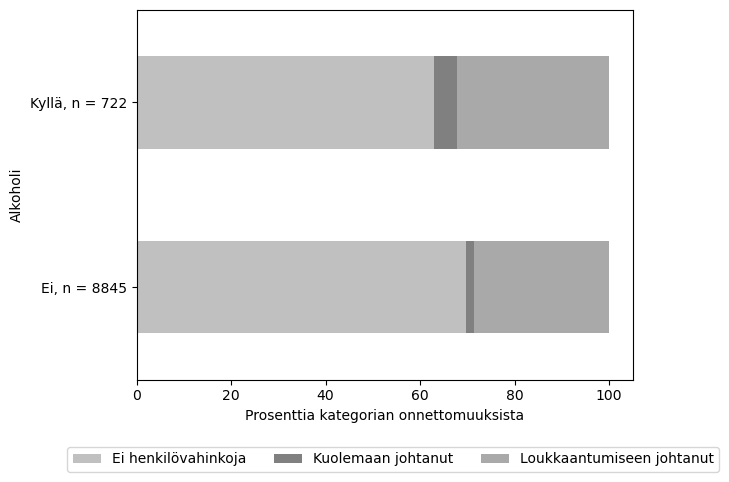

In [6]:
# näytetään äskeinen taulukko vaakapylväskaaviona
Dcolors = ['silver', 'gray', 'darkgray']
df2.T.plot.barh(stacked=True, color=Dcolors)
plt.xlabel('Prosenttia kategorian onnettomuuksista')
plt.legend(loc=(-0.14, -0.25), ncol=4)


print()
print('Alkoholin vaikutuksen alaisena tapahtuneissa onnettomuuksissa loukkaantumisia ja kuolemia')
print('on prosentuaalisesti hieman enemmän.')
plt.show()

In [7]:
p = chi2(df1)[1]
p = np.format_float_positional(p)
print(f'Khiin neliö-testin tulos: Riippuvuus on merkittävä, p-arvo on {p} < 0.05')

Khiin neliö-testin tulos: Riippuvuus on merkittävä, p-arvo on 0.0000000012089143709545488 < 0.05


<AxesSubplot:ylabel='Onlksel'>

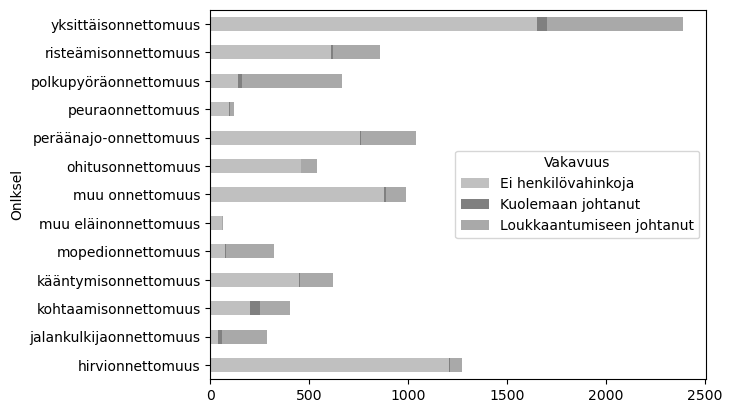

In [8]:
# onnettomuuksien vakavuuden jakautuminen onnettomuustyypin mukaan
df4 = pd.crosstab(df['Onlksel'], df['Vakavuus'])
df4.plot.barh(stacked=True, color=Dcolors)

In [9]:
# kohtaamisonnettomuuksissa näyttää olevan huomattava määrä kuolemia
# ristiintaulukoidaan kohtaamisonnettomuuksien vakavuus ja alkoholin osuus
K = df[df['Onlksel']=='kohtaamisonnettomuus']
df5 = pd.crosstab(K['Vakavuus'], K['Alkoholi'])
df5.columns = alk
df5.columns.name = 'Alkoholi'
df5

Alkoholi,Ei,Kyllä
Vakavuus,,
Ei henkilövahinkoja,189,12
Kuolemaan johtanut,42,10
Loukkaantumiseen johtanut,136,15



Alkoholin vaikutuksen alaisena tapahtuneissa kohtaamisonnettomuuksissa on prosentuaalisesti huomattavasti enemmän kuolemia.


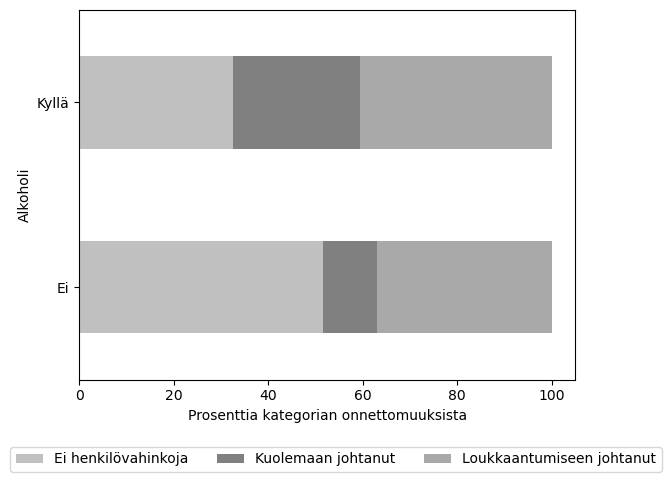

In [10]:
# katsotaan kohtaamisonnettomuuksien vakavuuden prosentuaalinen jako alkoholin perusteella
df6 = pd.crosstab(K['Vakavuus'], K['Alkoholi'], normalize='columns')*100
df6.columns = alk
df6.columns.name = 'Alkoholi'
df6.style.format('{:.1f} %')

df6.T.plot.barh(stacked=True, color=Dcolors)
plt.xlabel('Prosenttia kategorian onnettomuuksista')
plt.legend(loc=(-0.14, -0.25), ncol=4)

print()
print('Alkoholin vaikutuksen alaisena tapahtuneissa kohtaamisonnettomuuksissa on prosentuaalisesti huomattavasti enemmän kuolemia.')
plt.show()

In [11]:
p = chi2(df5)[1]
print(f'Khiin neliö-testin tulos: Riippuvuus on merkittävä, p-arvo on {p:.2f} < 0.05')

Khiin neliö-testin tulos: Riippuvuus on merkittävä, p-arvo on 0.01 < 0.05


Text(0, 0.5, 'Lämpötila')

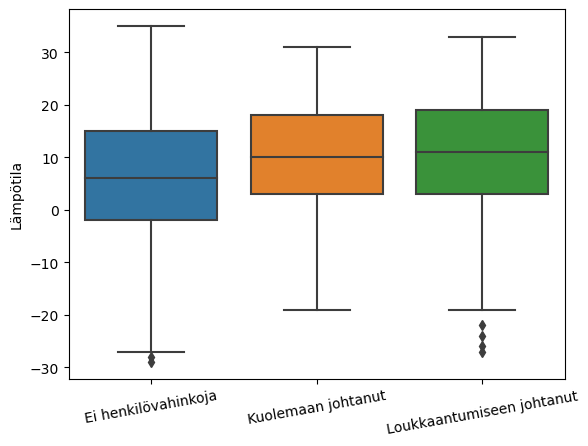

In [12]:
# onnettomuuksien vakavuus lämpötilan mukaan boxplottina
sns.boxplot(data=df, x='Vakavuus', y='Lämpötila')
plt.xticks(rotation=10, horizontalalignment="center")
plt.xlabel('')
plt.ylabel('Lämpötila')

In [13]:
# tehdään F-testi
# poistetaan ensin tyhjät arvot ja luodaan sitten ryhmät
df_dropna = df.dropna(subset=['Lämpötila'])
k1 = df_dropna['Lämpötila'][df_dropna['Vakavuus']=='Ei henkilövahinkoja']
k2 = df_dropna['Lämpötila'][df_dropna['Vakavuus']=='Kuolemaan johtanut']
k3 = df_dropna['Lämpötila'][df_dropna['Vakavuus']=='Loukkaantumiseen johtanut']

p = f_oneway(k1, k2, k3)[1]

# muokataan 'scientific notation' pois
p = np.format_float_positional(p)

print(f'F-testin tulos: Riippuvuus on merkittävä, p-arvo on {p} < 0.05')

F-testin tulos: Riippuvuus on merkittävä, p-arvo on 0.00000000000000000000000000000000000000000000000000000000000000000000000029219972655183067 < 0.05
